In [75]:
import os
import json
# import xlwings as xw
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

folder_path = "jatos_results_20240125"
metadata_path = "jatos_results_20240125/metadata.json"
out_path = 'experiment_data_20240125.xlsx'

In [3]:
with open(metadata_path, 'r') as file:
            metadata = json.load(file)

study_result = metadata['data'][0]['studyResults']
comp_cols = ['component_duration_' + str(i+1) for i in range(len(study_result[0]['componentResults']))]
meta_cols = ['worker_id','prolific_id','status','duration','duration_second'] + comp_cols

dict_meta = {key: [] for key in meta_cols}

for w in range(len(study_result)):
    if study_result[w]['studyState'] == 'FINISHED':
        dict_meta['worker_id'] += [str(study_result[w]['workerId'])]
        dict_meta['prolific_id'] += [study_result[w]['urlQueryParameters']['PROLIFIC_PID']]
        dict_meta['status'] += [study_result[w]['studyState']]
        dict_meta['duration'] += [study_result[w]['duration']]
        time_object = datetime.strptime(study_result[w]['duration'], "%H:%M:%S")
        duration_second = time_object.hour * 3600 + time_object.minute * 60 + time_object.second
        dict_meta['duration_second'] += [duration_second]
        for i in range(len(comp_cols)):
            dict_meta[comp_cols[i]] += [study_result[w]['componentResults'][i]['duration']]

df_meta = pd.DataFrame(dict_meta)


In [11]:
df_meta

,worker_id,prolific_id,status,duration,duration_second,component_duration_1,component_duration_2,component_duration_3,component_duration_4
0,434923,65b17c3a6264a7353dc9ed4b,FINISHED,00:05:25,325,00:00:12,00:00:09,00:00:48,00:00:49
1,434924,5de8e0ac9ba3e8000a970881,FINISHED,00:02:34,154,00:00:12,00:00:09,00:00:21,00:00:26
2,434925,59532996d5822e000125a73b,FINISHED,00:04:15,255,00:00:09,00:00:13,00:00:25,00:00:49
3,434926,5cd951d48ace520016ef7a31,FINISHED,00:03:56,236,00:00:12,00:00:06,00:00:28,00:01:09
4,434927,56f84c071b99b8000c365751,FINISHED,00:06:09,369,00:00:25,00:00:15,00:00:53,00:01:32
...,...,...,...,...,...,...,...,...,...
192,435125,6413590a5e16ccd8b72d3be2,FINISHED,00:03:23,203,00:00:06,00:00:10,00:00:24,00:00:37
193,435126,5fc6c6804b35890ed3285dbc,FINISHED,00:09:25,565,00:00:14,00:00:01,00:00:30,00:01:04
194,435130,5c92f797803bff0017fef8dd,FINISHED,00:02:22,142,00:00:04,00:00:07,00:00:21,00:00:34
195,435131,63a32488e685c05e9fb5988e,FINISHED,00:05:49,349,00:00:10,00:00:22,00:00:39,00:01:35


In [4]:
df_consistency = pd.DataFrame()
df_time = pd.DataFrame()
df_peli = pd.DataFrame()

def read_comp_result(file_path,df_consistency,df_time,df_peli):
    with open(file_path, 'r') as file:
            data = json.load(file)

    if 'task' in data:
        if data['task'] == 'consistency-check':
            df_consistency_new = pd.DataFrame(data['choice'])
            df_consistency_new['worker_id'] = data['worker_id']
            df_consistency_new['screen_width'] = data['screen_width']
            df_consistency = pd.concat([df_consistency, df_consistency_new], ignore_index=True)
        elif data['task'] == 'blank-filling':
            df_time_new = pd.DataFrame(data['choice'])
            df_time_new['worker_id'] = data['worker_id']
            df_time_new['prolific_id'] = data['url']['PROLIFIC_PID']
            df_time = pd.concat([df_time, df_time_new], ignore_index=True)
        elif data['task'] == 'income-earlier-later':
            url = data.pop('url')
            df_peli_new = pd.DataFrame(data,index=[data['worker_id']])
            df_peli_new['prolific_id'] = url['PROLIFIC_PID']
            df_peli = pd.concat([df_peli, df_peli_new], ignore_index=True)

    
    return df_consistency,df_time,df_peli


for root, dirs, files in os.walk(folder_path):
            for file in files:
                if file.endswith("data.txt"):
                    file_path = os.path.join(root, file)
                    print(file_path)
                    df_consistency,df_time,df_peli = read_comp_result(file_path,df_consistency,df_time,df_peli)

df_consistency.insert(0, 'worker_id', df_consistency.pop('worker_id'))
df_time.insert(0, 'worker_id', df_time.pop('worker_id'))
df_peli.insert(0, 'worker_id', df_peli.pop('worker_id'))

jatos_results_20240125\study_result_400684\comp-result_551809\data.txt
jatos_results_20240125\study_result_400684\comp-result_551811\data.txt
jatos_results_20240125\study_result_400685\comp-result_551812\data.txt
jatos_results_20240125\study_result_400685\comp-result_551816\data.txt
jatos_results_20240125\study_result_400685\comp-result_551823\data.txt
jatos_results_20240125\study_result_400685\comp-result_551843\data.txt
jatos_results_20240125\study_result_400686\comp-result_551819\data.txt
jatos_results_20240125\study_result_400686\comp-result_551821\data.txt
jatos_results_20240125\study_result_400686\comp-result_551828\data.txt
jatos_results_20240125\study_result_400686\comp-result_551837\data.txt
jatos_results_20240125\study_result_400687\comp-result_551822\data.txt
jatos_results_20240125\study_result_400687\comp-result_551826\data.txt
jatos_results_20240125\study_result_400687\comp-result_551835\data.txt
jatos_results_20240125\study_result_400687\comp-result_551854\data.txt
jatos_

In [5]:
df_check = pd.merge(df_consistency,df_time,on=['worker_id','front_amount','backend_amount'])

def check_fail(row):
    if row['sequence_single_choice'] == 'sequence':
        return row['indiff_point'] < row['single_amount']
    elif row['sequence_single_choice'] == 'single':
        return row['indiff_point'] > row['single_amount']
    else:
        return True

df_check['fail_check'] = df_check.apply(check_fail, axis=1)

df_check_result = df_check.groupby('worker_id')['fail_check'].sum() > 0
fail_consistency_check = df_check_result[df_check_result].index.unique()
len(fail_consistency_check)

40

In [6]:
fail_consistency_check

Index(['434924', '434925', '434933', '434938', '434939', '434948', '434950',
       '434951', '434956', '434965', '434970', '434973', '434975', '434987',
       '434991', '434994', '435006', '435007', '435012', '435014', '435023',
       '435025', '435034', '435037', '435044', '435050', '435051', '435061',
       '435071', '435078', '435082', '435085', '435088', '435091', '435094',
       '435102', '435109', '435112', '435125', '435126'],
      dtype='object', name='worker_id')

In [7]:
df_time_valid = df_time[~df_time['worker_id'].isin(fail_consistency_check)]
df_time_valid['value_surplus'] = df_time_valid['indiff_point'] - df_time_valid['front_amount']
df_time_valid = pd.merge(df_time_valid,
                         df_peli[['worker_id','choice_label','choice_value','response_time_mel']],on='worker_id'). \
                    sort_values(['worker_id','q_id'])

C:\Users\phd19zw1\AppData\Local\Temp\ipykernel_7528\443143684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_valid['value_surplus'] = df_time_valid['indiff_point'] - df_time_valid['front_amount']


In [36]:
df_time_valid = pd.read_csv('valid_sequence_data.csv')

df_time_valid['reward'] = df_time_valid.apply(lambda x: 'reward_' + x['seq_length'].split()[0] +'m_' + str(x['front_amount']),axis=1)

In [54]:
df_time_pivot = df_time_valid.pivot(index='worker_id', columns='reward', values='value_surplus')
k = 2
kmeans = KMeans(n_clusters=k,random_state=42)
kmeans.fit(df_time_pivot.values)

KMeans(n_clusters=2, random_state=42)

In [78]:
df_time_pivot['label'] = kmeans.labels_
cols = ['label'] + [col for col in df_time_pivot if col != 'label']
df_time_pivot = df_time_pivot[cols]
(df_time_pivot['label'] == 0).sum()

105

In [56]:
df_time_pivot.to_csv('cluster_result.csv')

In [77]:
df_time_label = pd.melt(df_time_pivot.reset_index(), id_vars=['worker_id','label'], var_name='reward', value_name='value_surplus')
df_time_label['seq_length'] = df_time_label['reward'].apply(lambda x:x.split('_')[1])
df_time_label['front_amount'] = df_time_label['reward'].apply(lambda x:x.split('_')[2])
df_time_label.to_csv('labeled_result.csv')

Text(0, 0.5, 'switch point minus front-end amount (£)')

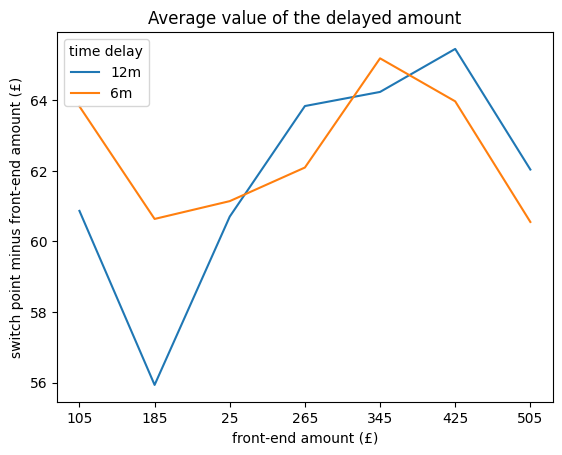

In [72]:
df_plot = df_time_label[df_time_label['label']== 0].groupby(['seq_length','front_amount'])['value_surplus'].mean().to_frame().reset_index()
front_amount_list = df_plot['front_amount'].unique()

for t in df_plot['seq_length'].unique():
    tab_plot = df_plot[df_plot['seq_length'] == t]
    plt.plot(tab_plot['front_amount'],tab_plot['value_surplus'],label=t)

plt.title('Average value of the delayed amount')
plt.legend(loc='best',title='time delay')
plt.xticks(front_amount_list)
# plt.yticks(np.arange(30,55,step=5))
plt.xlabel('front-end amount (£)')
plt.ylabel('switch point minus front-end amount (£)')

In [74]:
df_time_dummies = pd.concat([df_time_label,pd.get_dummies(df_time_label['worker_id'], prefix='worker_id')],axis=1)


In [211]:
(df_time_valid['value_surplus'] == 60).sum() / df_time_valid['value_surplus'].shape[0]

0.44858962693357596

In [221]:
df_time_valid.to_csv('valid_sequence_data.csv',index=None)

In [49]:
value_surplus_list = df_time_valid['value_surplus'].sort_values(ascending=False).to_list()
upper_limit = value_surplus_list[4]
lower_limit = value_surplus_list[-5]
df_time_nonconstant = df_time_valid[(df_time_valid['value_surplus'] < upper_limit) & 
                                    (df_time_valid['value_surplus'] > lower_limit)]

In [213]:
df_time_valid['total_money_heuristic'] = df_time_valid['value_surplus'] == 60
df_nonconstant = df_time_valid.groupby('worker_id')['total_money_heuristic'].sum() < 10

df_time_nonconstant = df_time_valid[df_time_valid['worker_id'].isin(df_nonconstant[df_nonconstant].index)]

In [214]:
df_time_nonconstant.shape[0] / 14

91.0

In [215]:
df_time_valid[df_time_valid['choice_value'] == 1].shape[0] / 14

122.0

In [216]:
df_time_nonconstant[df_time_nonconstant['choice_value'] == 1].shape[0] / 14

71.0

(array([70.,  9.,  3.,  2.,  2.,  5.,  0.,  4.,  4., 58.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

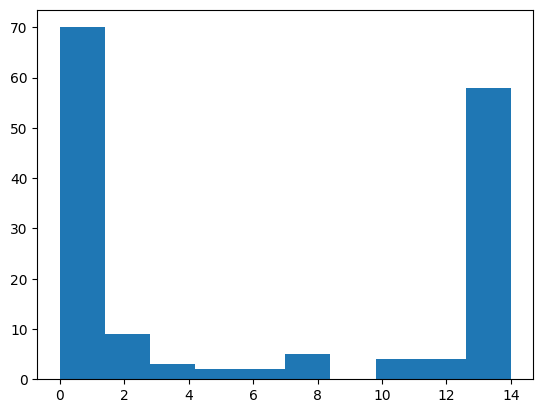

In [217]:
plt.hist(df_time_valid.groupby('worker_id')['total_money_heuristic'].sum())

Text(0, 0.5, 'switch point minus front-end amount (£)')

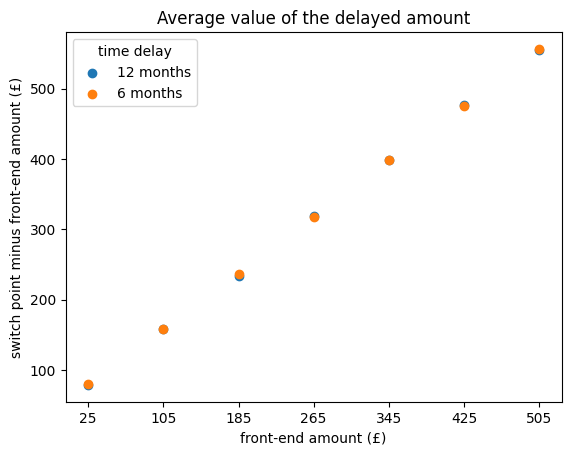

In [54]:
# df_time_nonconstant = df_time_valid[(df_time_valid['value_surplus'] >0) & (df_time_valid['value_surplus']<60)]
df_plot = df_time_nonconstant.groupby(['seq_length','front_amount'])['indiff_point'].mean().to_frame().reset_index()
front_amount_list = df_plot['front_amount'].unique()

for t in df_plot['seq_length'].unique():
    tab_plot = df_plot[df_plot['seq_length'] == t]
    plt.scatter(tab_plot['front_amount'],tab_plot['indiff_point'],label=t)

plt.title('Average value of the delayed amount')
plt.legend(loc='best',title='time delay')
plt.xticks(front_amount_list)
# plt.yticks(np.arange(30,55,step=5))
plt.xlabel('front-end amount (£)')
plt.ylabel('switch point minus front-end amount (£)')

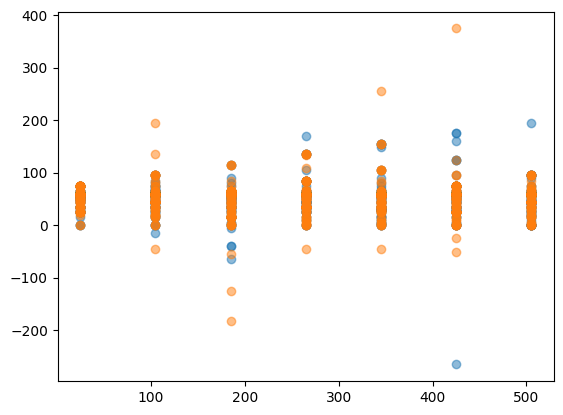

In [52]:
for t in df_plot['seq_length'].unique():
    tab_plot = df_time_valid[df_time_valid['seq_length'] == t]
    plt.scatter(tab_plot['front_amount'],tab_plot['value_surplus'],label=t,alpha=0.5)

IndexError: index 157 is out of bounds for axis 0 with size 157

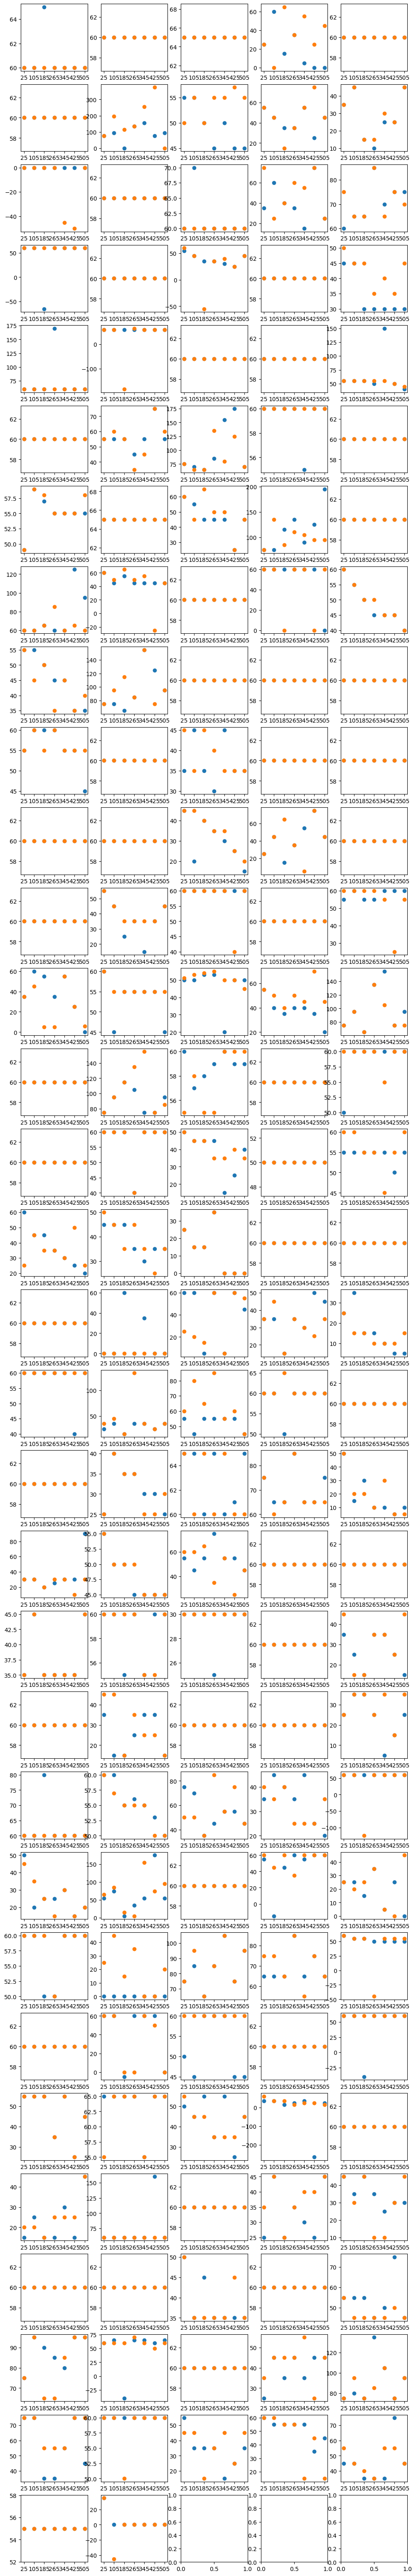

In [220]:
fig, axes = plt.subplots(32, 5, figsize=(12, 80))
front_amount_list = df_time_valid['front_amount'].unique()
pass_list = df_time_valid['worker_id'].unique()
seq_length_list = df_plot['seq_length'].unique()

for i in range(32):
    for j in range(5):
        df_plot_1 = df_time_valid[(df_time_valid['worker_id'] == pass_list[5*i+j]) &
                                (df_time_valid['seq_length'] == seq_length_list[0])]
        df_plot_2 = df_time_valid[(df_time_valid['worker_id'] == pass_list[5*i+j]) &
                                (df_time_valid['seq_length'] == seq_length_list[1])]
        
        # plot in current sub-figure
        axes[i, j].scatter(df_plot_1['front_amount'], df_plot_1['value_surplus'])
        axes[i, j].scatter(df_plot_2['front_amount'], df_plot_2['value_surplus'])
        # axes[i, j].set_title(f'reponser {pass_list[5*i+j]}')
        axes[i, j].set_xticks(front_amount_list)


plt.tight_layout()
plt.show()

In [126]:
df_plot_1

,worker_id,q_id,seq_length,front_amount,backend_amount,present_order,indiff_point,response_time_enter,prolific_id,value_surplus,choice_label,choice_value,response_time_mel


Text(0.5, 0, 'risky reward')

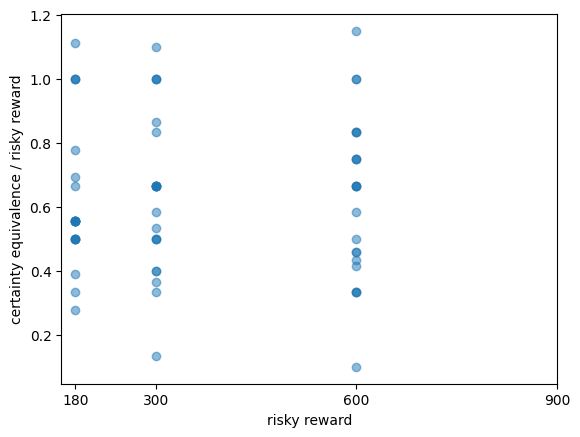

In [28]:
plt.scatter(df_risky['outcome'],df_risky['indiff_point']/df_risky['outcome'],alpha=0.5)
plt.xticks([180,300,600,900])
plt.ylabel('certainty equivalence / risky reward')
plt.xlabel('risky reward')

Text(0, 0.5, 'frequency')

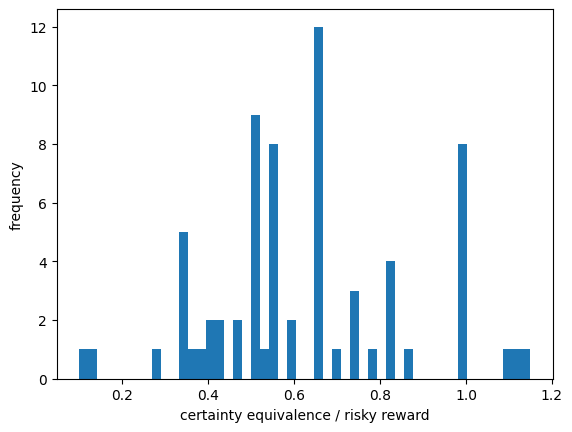

In [29]:
plt.hist(df_risky['indiff_point']/df_risky['outcome'],bins=50)
plt.xlabel('certainty equivalence / risky reward')
plt.ylabel('frequency')

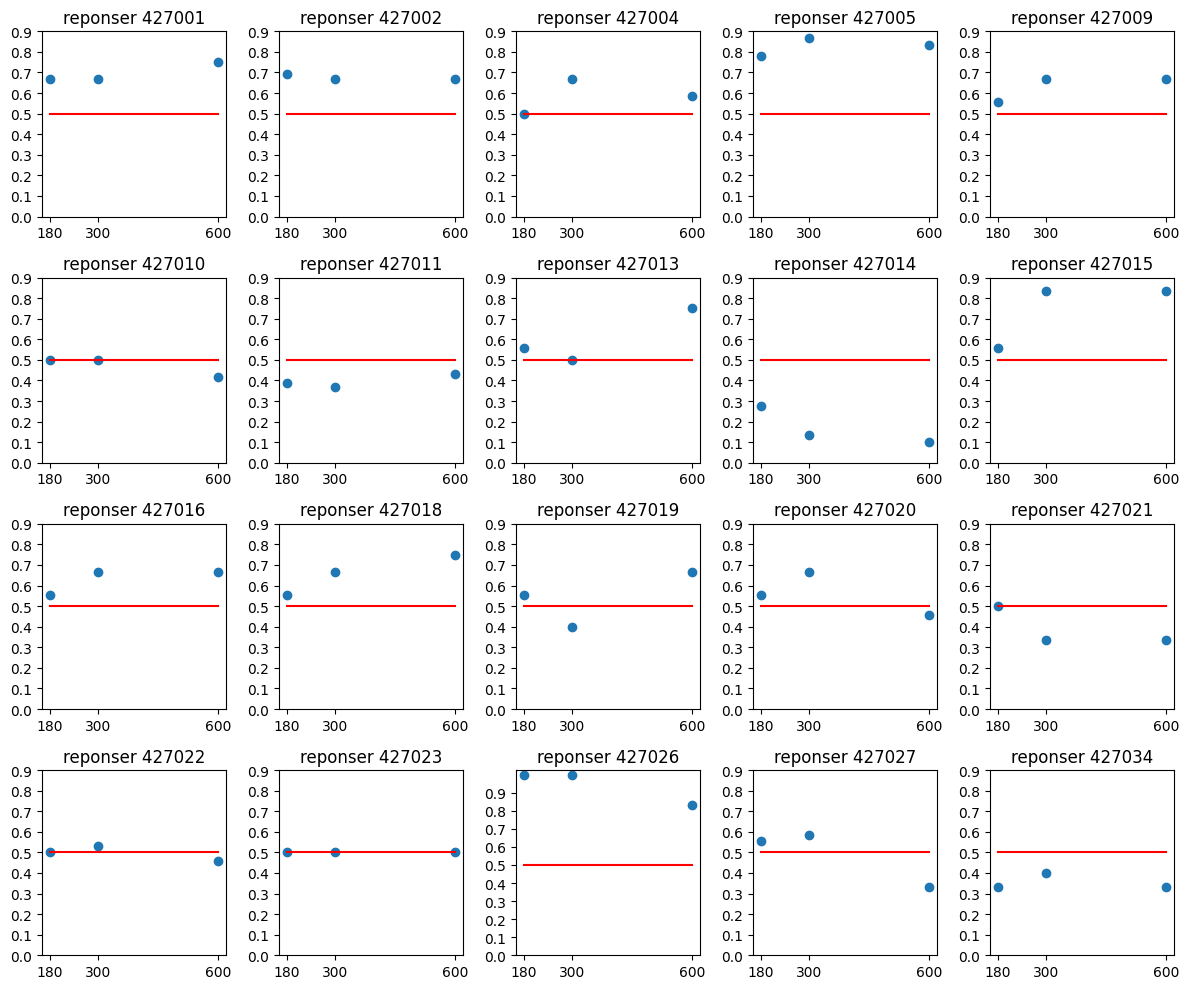

In [22]:
fig, axes = plt.subplots(4, 5, figsize=(12, 10))

for i in range(4):
    for j in range(5):
        df_plot = df_risky_valid[df_risky_valid['worker_id'] == pass_list[5*i+j]]
        
        # plot in current sub-figure
        axes[i, j].scatter(df_plot['outcome'], df_plot['ce_ratio'])
        axes[i, j].plot(df_plot['outcome'], np.repeat(0.5,3),color='red')
        axes[i, j].set_title(f'reponser {pass_list[5*i+j]}')
        axes[i, j].set_xticks([180,300,600])
        axes[i, j].set_yticks(np.arange(0,1,step=0.1))


plt.tight_layout()
plt.show()


([<matplotlib.axis.XTick at 0x1c287773f10>,
 [Text(185, 0, '185'),
  Text(345, 0, '345'),
  Text(425, 0, '425'),
  Text(505, 0, '505'),
  Text(265, 0, '265'),
  Text(25, 0, '25'),
  Text(105, 0, '105')])

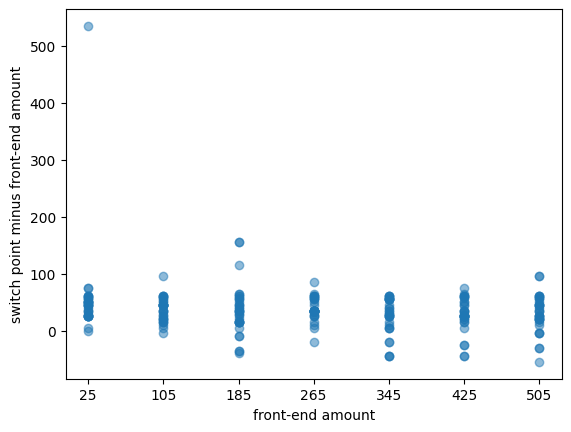

In [50]:
plt.scatter(df_time_valid['front_amount'],df_time_valid['value_surplus'],alpha=0.5)
plt.xlabel('front-end amount')
plt.ylabel('switch point minus front-end amount')
plt.xticks(df_time['front_amount'].unique())

([<matplotlib.axis.XTick at 0x1c28fc2cd60>,
 [Text(-55, 0, '−55'),
  Text(-40, 0, '−40'),
  Text(-25, 0, '−25'),
  Text(-10, 0, '−10'),
  Text(5, 0, '5'),
  Text(20, 0, '20'),
  Text(35, 0, '35'),
  Text(50, 0, '50'),
  Text(65, 0, '65'),
  Text(80, 0, '80'),
  Text(95, 0, '95'),
  Text(110, 0, '110'),
  Text(125, 0, '125'),
  Text(140, 0, '140'),
  Text(155, 0, '155')])

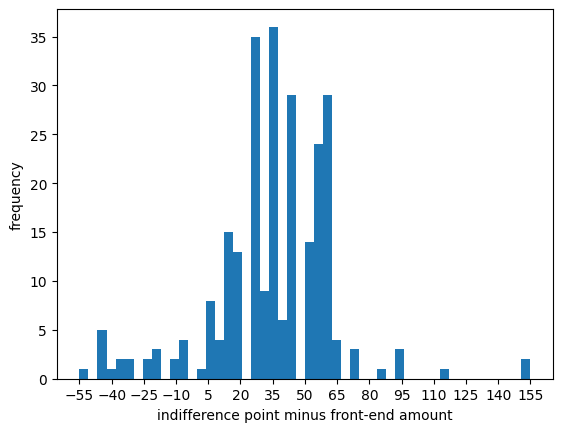

In [119]:

plt.hist(df_time_valid['value_surplus'][df_time_valid['value_surplus']<500],bins=50)
plt.xlabel('indifference point minus front-end amount')
plt.ylabel('frequency')
plt.xticks(np.arange(-55,160,step=15))

In [98]:
sum(df_time_valid['value_surplus'] > 60)

15

In [100]:
sum(df_time_valid['value_surplus'] <0)

22

In [101]:
df_time_valid['value_surplus'].shape

(260,)

In [112]:
df_time_valid[df_time_valid['value_surplus'] > 50]

,worker_id,condition,q_id,seq_length,front_amount,backend_amount,present_order,indiff_point,response_time_enter,confidence,response_time_confidence,value_surplus
7,427001,front-align,0,6 months,25,60,7,80,23508,100,3536,55
26,427004,front-align,8,6 months,345,60,0,405,9058,100,12078,60
27,427004,front-align,3,12 months,105,60,1,165,8536,100,8216,60
28,427004,front-align,5,12 months,185,60,2,245,11636,83,5617,60
29,427004,front-align,9,12 months,345,60,3,405,10145,95,18711,60
...,...,...,...,...,...,...,...,...,...,...,...,...
275,427027,front-align,2,6 months,105,60,2,160,18514,100,3726,55
276,427027,front-align,4,6 months,185,60,3,240,17015,100,3647,55
279,427027,front-align,3,12 months,105,60,6,157,14363,100,2795,52
280,427027,front-align,6,6 months,265,60,7,320,22363,100,5610,55


In [68]:
sum(np.abs(df_time_valid['value_surplus']) <= 5) 

70

In [64]:
len(df_time_valid['value_surplus'])

294

Text(0, 0.5, 'switch point minus front-end amount (£)')

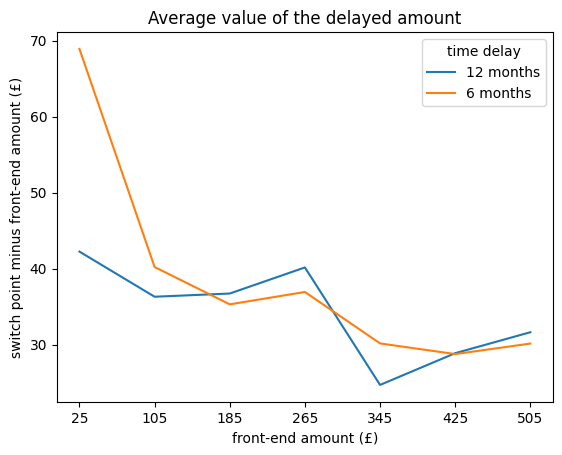

In [23]:
df_plot = df_time_valid.groupby(['seq_length','front_amount'])['value_surplus'].mean().to_frame().reset_index()
front_amount_list = df_plot['front_amount'].unique()

for t in df_plot['seq_length'].unique():
    tab_plot = df_plot[df_plot['seq_length'] == t]
    plt.plot(tab_plot['front_amount'],tab_plot['value_surplus'],label=t)

plt.title('Average value of the delayed amount')
plt.legend(loc='best',title='time delay')
plt.xticks(front_amount_list)
# plt.yticks(np.arange(30,55,step=5))
plt.xlabel('front-end amount (£)')
plt.ylabel('switch point minus front-end amount (£)')

Text(0, 0.5, 'switch point minus front-end amount (£)')

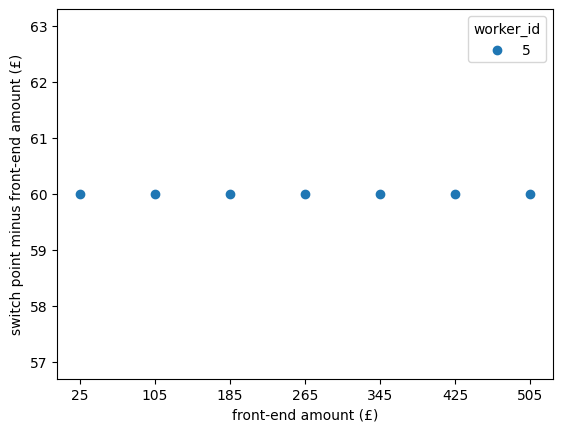

In [97]:
front_amount_list = df_plot['front_amount'].unique()
df_plot = df_time_valid[df_time_valid['seq_length'] == '6 months']

tab_plot = df_plot[df_plot['worker_id'] == pass_list[16]]
plt.scatter(tab_plot['front_amount'],tab_plot['value_surplus'],label=i)
plt.legend(loc='best',title='worker_id')
plt.xticks(front_amount_list)
plt.xlabel('front-end amount (£)')
plt.ylabel('switch point minus front-end amount (£)')

In [43]:
df_plot[df_plot['worker_id'] == pass_comprehension_id[0]]

,worker_id,condition,q_id,seq_length,front_amount,backend_amount,present_order,indiff_point,response_time_intertemporal,confidence,response_time_confidence,value_surplus
239,426965,front-align,4,6 months,185,60,1,200,27498,50,2651,15
240,426965,front-align,6,6 months,265,60,2,300,55499,83,2646,35
241,426965,front-align,12,6 months,505,60,3,550,13833,81,3249,45
242,426965,front-align,8,6 months,345,60,4,385,13514,64,2785,40
245,426965,front-align,10,6 months,425,60,7,470,13699,61,2464,45
247,426965,front-align,2,6 months,105,60,9,150,11766,81,2548,45
248,426965,front-align,0,6 months,25,60,10,75,23065,72,7779,50


In [30]:
df_time_valid

,worker_id,condition,q_id,seq_length,front_amount,backend_amount,present_order,indiff_point,response_time_intertemporal,confidence,response_time_confidence,value_surplus
0,426940,front-align,13,12 months,505,60,0,545,4552,70,5005,40
1,426940,front-align,7,12 months,265,60,1,300,47441,61,2014,35
2,426940,front-align,12,6 months,505,60,2,545,3668,50,2464,40
3,426940,front-align,0,6 months,25,60,3,35,11133,70,4268,10
4,426940,front-align,8,6 months,345,60,4,380,2648,78,3155,35
...,...,...,...,...,...,...,...,...,...,...,...,...
317,426972,front-align,0,6 months,25,60,9,80,5002,27,2293,55
318,426972,front-align,2,6 months,105,60,10,160,5542,30,2685,55
319,426972,front-align,6,6 months,265,60,11,315,5696,30,5069,50
320,426972,front-align,5,12 months,185,60,12,235,8500,29,2531,50


Text(0.5, 0, 'switch point (£)')

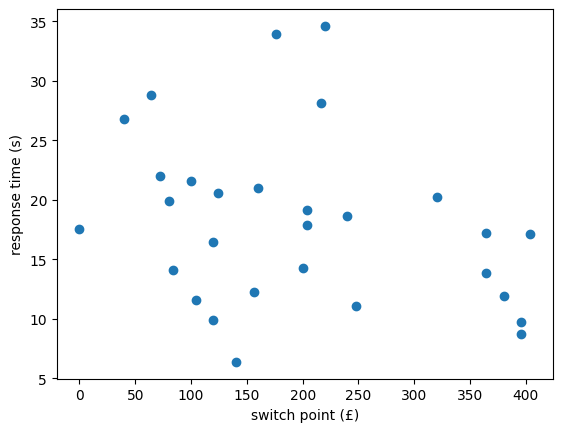

In [80]:
risk400 = df_risky[(df_risky['outcome'] == 400) & (df_risky['response_time_risky'] < 7e4)]

plt.scatter(risk400['indiff_point'], risk400['response_time_risky']/1000)
plt.ylabel("response time (s)")
plt.xlabel("switch point (£)")

In [6]:
df_time_valid = df_time[df_time['worker_id'].isin(pass_comprehension_id)]

df_time_back = df_time_valid[df_time_valid['condition']=='back-align']
df_time_back['value_surplus'] = df_time_back['indiff_point'] - df_time_back['backend_amount']
df_time_front = df_time_valid[df_time_valid['condition']=='front-align']
df_time_front['value_surplus'] = df_time_front['indiff_point'] - df_time_front['front_amount']

print(df_time_front['confidence'].mean())
print(df_time_back['confidence'].mean())

81.69444444444444
79.93359375


C:\Users\zarkwang\AppData\Local\Temp\ipykernel_2488\3421178493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_back['value_surplus'] = df_time_back['indiff_point'] - df_time_back['backend_amount']
C:\Users\zarkwang\AppData\Local\Temp\ipykernel_2488\3421178493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_front['value_surplus'] = df_time_front['indiff_point'] - df_time_front['front_amount']


In [15]:
df_time[df_time['condition']=='front-align']['worker_id'].unique().shape

(9,)

Text(0, 0.5, 'frequency')

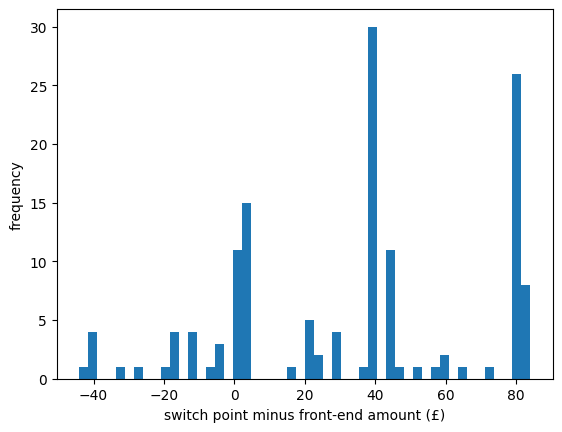

In [8]:
plt.hist(df_time_front['value_surplus'][(df_time_front['value_surplus']<100) & (df_time_front['value_surplus']>-50)],bins=50)
plt.xlabel('switch point minus front-end amount (£)')
plt.ylabel('frequency')

Text(0, 0.5, 'switch point (£)')

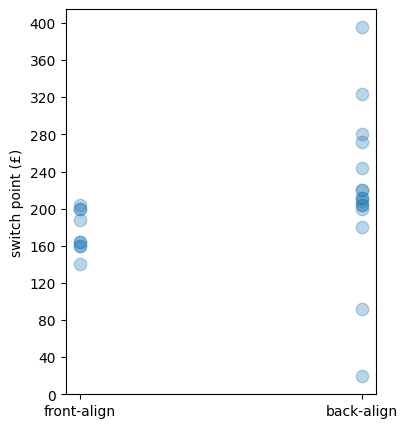

In [156]:
tab_plot = df_time_valid[(df_time_valid['q_id'] == 5)]

plt.figure(figsize=(4,5))
plt.scatter(tab_plot['condition'],tab_plot['indiff_point'],s=80,alpha=0.3)
plt.yticks(np.arange(0,440,step=40))
plt.ylabel('switch point (£)')

mean confidence: 74.55555555555556
mean confidence: 82.03804347826087


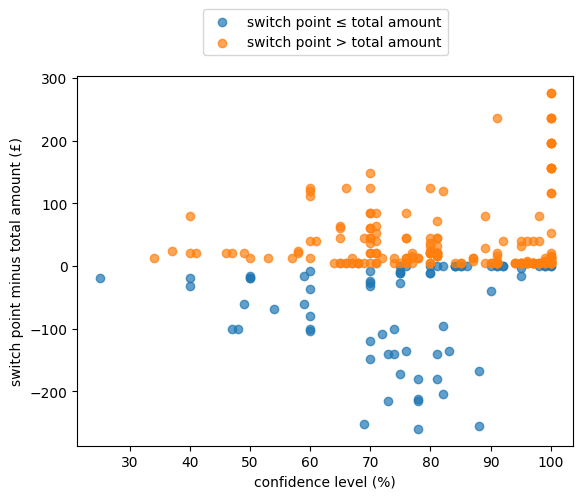

In [7]:
point_1 = df_time_back[df_time_back['value_surplus'] <= df_time_back['front_amount']]
point_2 = df_time_back[df_time_back['value_surplus'] > df_time_back['front_amount']]

plt.scatter(point_1['confidence'],point_1['value_surplus'] - point_1['front_amount'],alpha=0.7,label='switch point ≤ total amount')
plt.scatter(point_2['confidence'],point_2['value_surplus'] - point_2['front_amount'],alpha=0.7,label='switch point > total amount')
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.2))
plt.xlabel('confidence level (%)')
plt.ylabel('switch point minus total amount (£)')
print('mean confidence:',point_1['confidence'].mean())
print('mean confidence:',point_2['confidence'].mean())

mean confidence: 72.53125
mean confidence: 84.3125


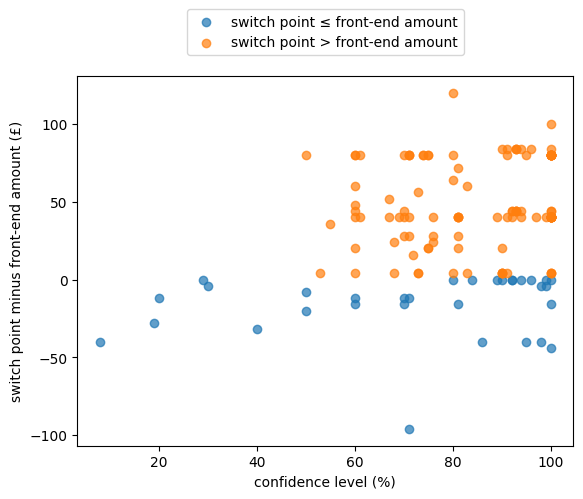

In [150]:
point_1 = df_time_front[df_time_front['value_surplus'] <= 0]
point_2 = df_time_front[df_time_front['value_surplus'] > 0]

plt.scatter(point_1['confidence'],point_1['value_surplus'],alpha=0.7,label='switch point ≤ front-end amount')
plt.scatter(point_2['confidence'],point_2['value_surplus'],alpha=0.7,label='switch point > front-end amount')
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.2))
plt.xlabel('confidence level (%)')
plt.ylabel('switch point minus front-end amount (£)')
print('mean confidence:',point_1['confidence'].mean())
print('mean confidence:',point_2['confidence'].mean())

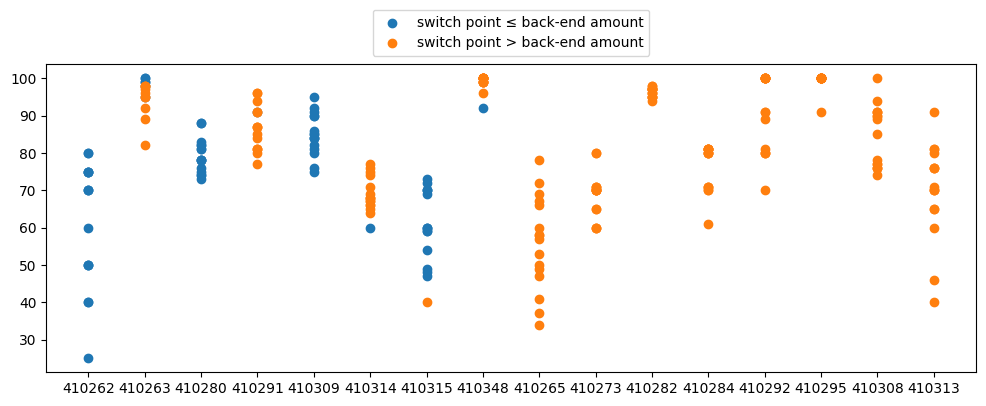

In [8]:
point_1 = df_time_back[df_time_back['value_surplus'] <= df_time_back['front_amount']]
point_2 = df_time_back[df_time_back['value_surplus'] > df_time_back['front_amount']]

# point_1 = df_time_front[df_time_front['value_surplus'] <= 0]
# point_2 = df_time_front[df_time_front['value_surplus'] > 0]

plt.figure(figsize=(12,4))
plt.scatter(point_1['worker_id'],point_1['confidence'],label='switch point ≤ back-end amount')
plt.scatter(point_2['worker_id'],point_2['confidence'],label='switch point > back-end amount')
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.2))

In [11]:
df_time_back['worker_id'].unique().shape

(16,)

In [139]:
cancel_id_back = ['410262','410280','410309','410315']
cancel_id_front = ['410261','410305']

worker_id_valid_back = list(set(df_time_back['worker_id']))
for i in cancel_id_back:
    worker_id_valid_back.remove(i)
df_time_back = df_time_back[df_time_back['worker_id'].isin(worker_id_valid_back)]

worker_id_valid_front = list(set(df_time_front['worker_id']))
for i in cancel_id_front:
    worker_id_valid_front.remove(i)
df_time_front = df_time_front[df_time_front['worker_id'].isin(worker_id_valid_front)]

Text(0, 0.5, 'switch point minus front-end amount (£)')

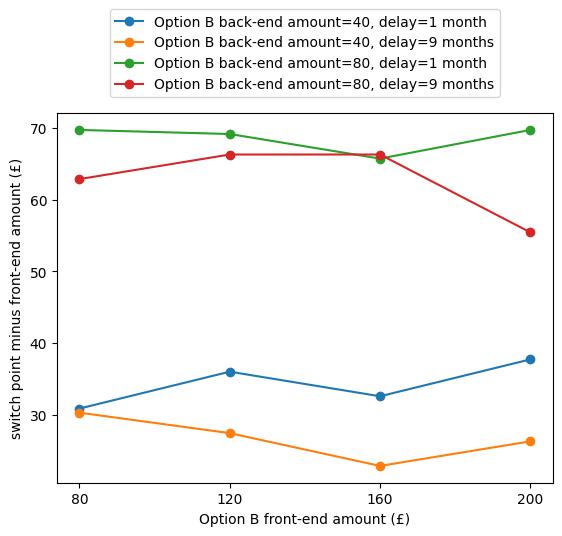

In [140]:
vary_amount_list = np.unique(df_time_front['front_amount'])
other_amount_list  = np.unique(df_time_front['backend_amount'])
seq_length_list = np.unique(df_time_front['seq_length'])
label_list = [(i, j) for i in other_amount_list for j in seq_length_list]

for p in range(len(label_list)):
    tab_plot = df_time_front[(df_time_front['backend_amount'] == label_list[p][0]) & \
                               (df_time_front['seq_length'] == label_list[p][1])]

    tab_plot = tab_plot.groupby(['front_amount'])['value_surplus'].mean().to_frame().reset_index()
    label = 'Option B back-end amount=' + str(label_list[p][0]) + ', delay=' + label_list[p][1] 
    plt.plot(tab_plot['front_amount'],tab_plot['value_surplus'],marker='o', linestyle='-', label=label)
    plt.legend() 

plt.xticks(vary_amount_list)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.3))
plt.xlabel('Option B front-end amount (£)')
plt.ylabel('switch point minus front-end amount (£)')


Text(0, 0.5, 'switch point minus back-end amount (£)')

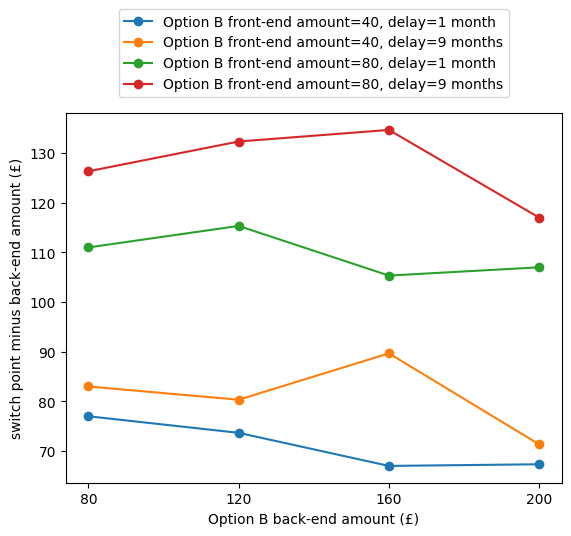

In [141]:
for p in range(len(label_list)):
    tab_plot = df_time_back[(df_time_back['front_amount'] == label_list[p][0]) & \
                               (df_time_back['seq_length'] == label_list[p][1])]

    tab_plot = tab_plot.groupby(['backend_amount'])['value_surplus'].mean().to_frame().reset_index()
    label = 'Option B front-end amount=' + str(label_list[p][0]) + ', delay=' + label_list[p][1] 
    plt.plot(tab_plot['backend_amount'],tab_plot['value_surplus'],marker='o', linestyle='-', label=label)
    plt.legend() 

plt.xticks(vary_amount_list)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.3))
plt.xlabel('Option B back-end amount (£)')
plt.ylabel('switch point minus back-end amount (£)')

Text(0, 0.5, 'confidence level (%)')

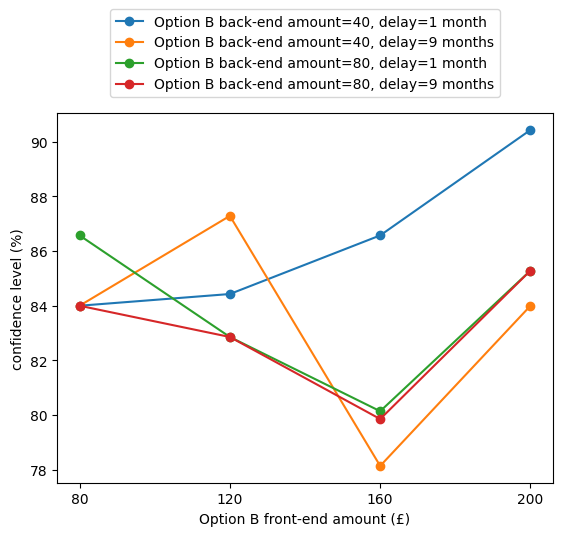

In [142]:
for p in range(len(label_list)):
    tab_plot = df_time_front[(df_time_front['backend_amount'] == label_list[p][0]) & \
                               (df_time_front['seq_length'] == label_list[p][1])]
    tab_plot = tab_plot.groupby(['front_amount'])['confidence'].mean().to_frame().reset_index()
    label = 'Option B back-end amount=' + str(label_list[p][0]) + ', delay=' + label_list[p][1] 
    plt.plot(tab_plot['front_amount'],tab_plot['confidence'],marker='o', linestyle='-', label=label)
    plt.legend() 

plt.xticks(vary_amount_list)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.3))
plt.xlabel('Option B front-end amount (£)')
plt.ylabel('confidence level (%)')

Text(0, 0.5, 'confidence level (%)')

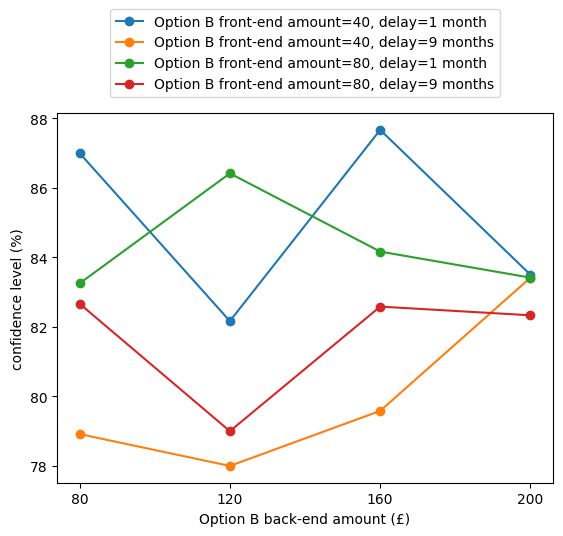

In [143]:
for p in range(len(label_list)):
    tab_plot = df_time_back[(df_time_back['front_amount'] == label_list[p][0]) & \
                               (df_time_back['seq_length'] == label_list[p][1])]
    tab_plot = tab_plot.groupby(['backend_amount'])['confidence'].mean().to_frame().reset_index()
    label = 'Option B front-end amount=' + str(label_list[p][0]) + ', delay=' + label_list[p][1] 
    plt.plot(tab_plot['backend_amount'],tab_plot['confidence'],marker='o', linestyle='-', label=label)
    plt.legend() 

plt.xticks(vary_amount_list)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.3))
plt.xlabel('Option B back-end amount (£)')
plt.ylabel('confidence level (%)')

In [14]:
for i in range(len(cond)):
    tab_plot_cond = tab_plot[tab_plot['q_cond'] == cond[i]]
    
    plt.plot(tab_plot_cond['q_num']*3, tab_plot_cond['count_b'], marker='o', linestyle='-', label=cond_label[i])
    plt.xlabel('X')
    plt.ylabel('Number of subjects choosing B')
    plt.legend() 

plt.xticks(tab_plot_cond['q_num']*3)

,condition,front_amount,backend_amount,seq_length,indiff_point
0,back-align,40,80,1 month,136.250000
1,back-align,40,80,9 months,143.750000
2,back-align,40,120,1 month,167.250000
3,back-align,40,120,9 months,176.000000
4,back-align,40,160,1 month,202.000000
5,back-align,40,160,9 months,218.000000
6,back-align,40,200,1 month,241.250000
7,back-align,40,200,9 months,240.500000
8,back-align,80,80,1 month,172.500000
9,back-align,80,80,9 months,178.500000


In [108]:
# Create an Excel Application object
app = xw.App(visible=True)

# Create a new workbook within the application object
wb = app.books.add()

# Add each DataFrame to a separate sheet in the workbook
wb.sheets.add('risky_results').range('A1').value = df_risky
wb.sheets.add('intertemporal_results').range('A1').value = df_time
wb.sheets.add('practice_results').range('A1').value = df_train
wb.sheets.add('meta_data').range('A1').value = df_meta
wb.sheets['Sheet1'].delete()

# Save the Excel file
wb.save(out_path)

# Quit the Excel application object
app.quit()

In [1]:
140 * 16

2240